In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from langdetect import detect

import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn

color = sns.color_palette()

import plotly.graph_objs as go


import cufflinks as cf
cf.go_offline()
import plotly.express as px

# Venn diagram
from matplotlib_venn import venn2
import re
import nltk

import gc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [3]:
# importing libraries for positives words 
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

In [4]:
# import necessary libraries for wordclouds
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [5]:
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

In [6]:
## Data preprocessing
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)
punctuation.add( "“" ) 
punctuation.add("”" )
punctuation.add('’') 

lemmatize = WordNetLemmatizer()

def cleaning(article):
    one = " ".join([i for i in article.lower().split() if i not in stopwords])
    two = "".join(i for i in one if i not in punctuation)
    three = " ".join(lemmatize.lemmatize(i) for i in two.split())
    return three

In [7]:
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '’',
 '“',
 '”'}

## VADER FUNCS

In [8]:
# load the SentimentIntensityAnalyser object in
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [9]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    

# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

# Premier League 

## Data  Cleaning

In [10]:
#Import the data
df = pd.read_csv('../datasets/_1-PremierLeague - Búsqueda de Twitter _ Twitter.csv', error_bad_lines=False)
df

b'Skipping line 2001: expected 8 fields, saw 15\nSkipping line 4001: expected 8 fields, saw 15\n'


,Name,User,Date,Comment,Answers,Retweet,Likes,Text
0,Man Utd Corner,@ManUtdCorner7,41s,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner
1,Mads WIlliam Pagh Thomasen,@m2masen,20min,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen
2,Infogol,@InfogolApp,24min,"""Although #NUFC's loss was expected, the mann...",NaN,5.0,9,Infogol
3,Billy Wood,@BillyWood__,47min,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood
4,Sporting Excitement,@SportingExcite,1h,Man Utd verdict: Solskjaer must trust Van de B...,NaN,NaN,NaN,Sporting Excitement
...,...,...,...,...,...,...,...,...
5325,Ekemini Daniel,@dee_kemus,21 nov.,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel
5326,Man Utd Corner,@ManUtdCorner7,21 nov.,The title charge is on\n\n#MUFC #ManUtd #Manch...,NaN,NaN,3,Man Utd Corner
5327,Mats FC,@MatsMUFC,21 nov.,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC
5328,RationalRed,@red_rational,21 nov.,I quite like the idea of VAR. I dont think it ...,NaN,NaN,3,RationalRed


In [11]:
# Change the name of the columns 
df.columns = "Name","User" , "Date", "Text", "Comment", "Retweet", "Likes", "Desc"

In [12]:
# Checking shape ...
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.Text.duplicated().sum()))

The dataset has 5330 rows and 8 columns.
It contains 191 duplicates.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330 entries, 0 to 5329
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     5264 non-null   object 
 1   User     5327 non-null   object 
 2   Date     5330 non-null   object 
 3   Text     5327 non-null   object 
 4   Comment  835 non-null    object 
 5   Retweet  1084 non-null   float64
 6   Likes    2342 non-null   object 
 7   Desc     5263 non-null   object 
dtypes: float64(1), object(7)
memory usage: 333.2+ KB


In [14]:
# How look like the null-values in the Name, looks 'normal' so move on
df[df.Name.isnull()]

,Name,User,Date,Text,Comment,Retweet,Likes,Desc
168,NaN,NaN,14h,NaN,NaN,NaN,NaN,NaN
214,NaN,@AvoXFCB,15h,Hahaha whaaat? #PremierLeague,NaN,NaN,NaN,NaN
219,NaN,@AvoXFCB,16h,Hahaha whaaat? #PremierLeague,NaN,NaN,NaN,NaN
371,NaN,@IKun_Aguero10I,18h,☆Looking to build agein good squad for next se...,2,1.0,4,NaN
434,NaN,@PremyerLiqa,19h,After week 10 \n 2 teams have the same points!...,NaN,13.0,14,NaN
...,...,...,...,...,...,...,...,...
4775,NaN,@bluefootball_,22 nov.,"Quaquadois de volta, será?\nImportante é que o...",1,NaN,NaN,NaN
4985,NaN,@PremyerLiqa,22 nov.,MATCH DAY \n\n\nToday \n\n\nQabala FK \n Neftc...,1,11.0,13,NaN
5006,NaN,@Regista_004,22 nov.,And we've got the most expensive front 3 in th...,NaN,NaN,NaN,NaN
5074,NaN,@Luisito_Bandera,22 nov.,#Futbol\n Resultados Finales:\n\n#PremierLeagu...,NaN,NaN,NaN,NaN


In [15]:
# How look like the null-values in the User, this are empty in the Text value to
df[df.User.isnull()]

,Name,User,Date,Text,Comment,Retweet,Likes,Desc
168,NaN,NaN,14h,NaN,NaN,NaN,NaN,NaN
2389,NaN,NaN,23 nov.,NaN,NaN,NaN,NaN,NaN
3784,NaN,NaN,22 nov.,NaN,NaN,NaN,NaN,NaN


In [16]:
# Selected all the rows that have not null values in User
df = df[~df.User.isnull()]

In [17]:
# Dropped the values duplicates
df.drop(list(df[df.Text.duplicated()].index), axis=0,inplace=True)

In [18]:
# Reset the index
df.reset_index(drop=True, inplace = True)

In [19]:
# Checking the values in Date variable, the tweets of the 25/nov are counting by hours
df.Date.unique()

array(['41s', '20min', '24min', '47min', '1h', '2h', '3h', '4h', '5h',
       '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h',
       '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h', '24 nov.',
       '23 nov.', '22 nov.', '21 nov.'], dtype=object)

In [20]:
df.loc[df.Date.str.contains("nov.")]

,Name,User,Date,Text,Comment,Retweet,Likes,Desc
617,Edward Fenner,@edfenner77,24 nov.,I do wonder at the attitude of #PremierLeague ...,NaN,NaN,2,Edward Fenner
618,InsiderSportHQ,@InsiderSportHQ,24 nov.,A 'limited number' of supporters will be allow...,NaN,NaN,NaN,InsiderSportHQ
619,andy rimmer,@ianandrewrimmer,24 nov.,Returning fans - how can the govt. allow some ...,NaN,NaN,1,andy rimmer
620,R.Sport,@republic_sports,24 nov.,#ICYMI: Jack Grealish charged once again after...,NaN,NaN,7,R.Sport
621,Thirst Gen Sports,@ThirstGenSports,24 nov.,#RT \n@ThePFSA\n: Wesley Fofana's incredible a...,NaN,NaN,NaN,Thirst Gen Sports
...,...,...,...,...,...,...,...,...
5133,Ekemini Daniel,@dee_kemus,21 nov.,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel
5134,Man Utd Corner,@ManUtdCorner7,21 nov.,The title charge is on\n\n#MUFC #ManUtd #Manch...,NaN,NaN,3,Man Utd Corner
5135,Mats FC,@MatsMUFC,21 nov.,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC
5136,RationalRed,@red_rational,21 nov.,I quite like the idea of VAR. I dont think it ...,NaN,NaN,3,RationalRed


In [21]:
# Standarized the Date
df.loc[~df.Date.str.contains("nov."), "Date"] = "25 nov."

In [22]:
# Added the 2020 in the Date
df.loc[:,"Date"] += " 2020"

In [23]:
# Repleced the Nov, for later trasform to datatime
df["Date" ]= df.Date.str.replace(" nov. ", "-11-")

In [24]:
# Filled the null values in Date, using the ffill method 
df.Date.fillna(method='ffill', inplace=True) 

In [25]:
#Trasformed to Datetime
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [26]:
df.Date.value_counts()

2020-11-22    2551
2020-11-23    1594
2020-11-25     617
2020-11-24     276
2020-11-21     100
Name: Date, dtype: int64

In [27]:
df.User.value_counts()

@EnglishPre_b       197
@TabureAbuzer        47
@rfutbol             46
@LFC_NewStories      41
@okezonenews         40
                   ... 
@SanketUikey          1
@cappysworldent       1
@MikolasAndrej        1
@mybrainthoughts      1
@neaathletika         1
Name: User, Length: 2703, dtype: int64

In [28]:
df.Name.value_counts()

English Premier League Briefly    197
Abuzer                             47
Resultados de Fútbol               46
LFC News                           41
Okezone                            40
                                 ... 
Michał Moch                         1
Prem Icon Cards                     1
LeicesterTH                         1
James Olyott                        1
Aiden Boyer - Sports Reports        1
Name: Name, Length: 2647, dtype: int64

## Data Trasformation

In [29]:
# Trasformed the User names to lower case
df["User"] = df['User'].map(lambda x: x.lower() if isinstance(x,str) else x)

#Genereted a list of user that are magazines, newspaper, and the because these aren't User who express their feeling for the sport, 
#they are working for the sports just informing. Dropped the results

listofno = (list(df[df.Text.str.contains("0 - 0")].User) + list(df[df.Text.str.contains("0 - 1")].User) + 
            list(df[df.Text.str.contains("1 - 0")].User) + list(df[df.Text.str.contains("1 - 1")].User)  + 
            list(df[df.Text.str.contains("1 - 2")].User) +  list(df[df.Text.str.contains("2 - 3")].User) + 
            list(df[df.Text.str.contains("3 - 3")].User)+ list(df[df.User.str.contains("footbal")].User) + 
            list(df[df.User.str.contains("news")].User)+ list(df[df.User.str.contains("times")].User) + 
            list(df[df.User.str.contains("review")].User) + list(df[df.User.str.contains("sport")].User)+ 
            list(df[df.User.str.contains("futb")].User) + list(df[df.User.str.contains("gol")].User)) 
listofno = listofno + ["@youhalal", "@rfutbol",  "@lfc_newstories" ,"@englishpre_b", "@footbottrivia",  "@fbpredictions", "@angusmoses", "@golalerta", "@EnglishPre_b"]

# Dropped the User duplicates in the list
listofno = list(dict.fromkeys(listofno)) 
listofno 

['@soccerscoresirl',
 '@premier_hero',
 '@notideportiva',
 '@howlerspodcast',
 '@statisticsports',
 '@a09sports',
 '@juanjojimenez_t',
 '@footballdayy2',
 '@wearepleague',
 '@arsenalamerica',
 '@talkfootballeur',
 '@guti99',
 '@jason_sagini',
 '@k_apolo_92',
 '@dekisa_sport',
 '@diiellzamustafa',
 '@futbolworldfc',
 '@bleachersfb',
 '@sofascorept',
 '@frank____m',
 '@oleoleartwork',
 '@ffootball2020',
 '@gifts_football',
 '@f9footballmedia',
 '@footballfriday6',
 '@realfootballpod',
 '@allfootball8k',
 '@footballlaw',
 '@hysfootball',
 '@jda_footballpod',
 '@footballfundits',
 '@lavistafootball',
 '@jpfootball',
 '@footballcoachx',
 '@footballisme',
 '@jobs4football',
 '@footballtalkx',
 '@ukfootballscho1',
 '@anytimefootball',
 '@footballpubmx_',
 '@footballmarketx',
 '@footballlinkup1',
 '@footballfanapp',
 '@footballitalia',
 '@footballlineups',
 '@onefootball',
 '@footballhub_pl',
 '@fbhfootball',
 '@footballutdtv',
 '@one2footballuk',
 '@shock_football',
 '@footballpoint3',
 '@_wt

In [30]:
# Selected the user that aren't in the listofno
df1 = df[~df.User.isin(listofno)]
df1.head(10)

,Name,User,Date,Text,Comment,Retweet,Likes,Desc
0,Man Utd Corner,@manutdcorner7,2020-11-25,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen
3,Billy Wood,@billywood__,2020-11-25,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood
5,Akinola Ayodele (ofr),@awhy03,2020-11-25,En respuesta a \n@goal,NaN,NaN,NaN,Akinola Ayodele (ofr)
7,Li Monika,@1xb_chinese,2020-11-25,“圣徒”南安普敦周一在英超客场以1比1战平“狼队”伍尔弗汉普敦，沃尔科特时隔14年再为旧东家...,NaN,NaN,NaN,Li Monika
8,Inplay Challenges,@bash_the_bookie,2020-11-25,Yet to try out WilliamHill?\n\nThey will credi...,NaN,NaN,NaN,Inplay Challenges
9,The VAR Show,@thevarshow1,2020-11-25,Amazing talk with : \n@neiljonesgoal\n\n\nTo W...,NaN,NaN,NaN,The VAR Show
11,Your Betting Offers,@bettngtips,2020-11-25,Betting with Coral\none of the most familiar n...,NaN,NaN,NaN,Your Betting Offers
12,David Nicolas Marega,@davidmarega74,2020-11-25,"Violencia en el fútbol de #Ucrania, los barras...",NaN,NaN,NaN,David Nicolas Marega
13,Laura Westwood,@rockchicklau,2020-11-25,En respuesta a \n@TipsEvolution,NaN,NaN,NaN,Laura Westwood


In [31]:
df1.User.value_counts()

@tabureabuzer       47
@bettngtips         32
@manutdcorner7      22
@flyingeze          17
@ricky9537          16
                    ..
@gilmar_zambrano     1
@nguvinm             1
@kuismorks           1
@arsenalstarting     1
@neaathletika        1
Name: User, Length: 2371, dtype: int64

In [32]:
df1[df1.User == "@tabureabuzer"]

,Name,User,Date,Text,Comment,Retweet,Likes,Desc
62,Abuzer,@tabureabuzer,2020-11-25,Canlıda önereceğim maçlar:\nDortmund-Club Brug...,3,NaN,13,Abuzer
64,Abuzer,@tabureabuzer,2020-11-25,WOONNNNN biraz erken won aldık demin şimdi old...,1,NaN,6,Abuzer
72,Abuzer,@tabureabuzer,2020-11-25,"Juventus-Ferencvaros\nCanlı-İY 2,5 Korner Üst\...",6,1.0,8,Abuzer
75,Abuzer,@tabureabuzer,2020-11-25,Vereyim mi bir kombin daha isteyenler \n çöksü...,3,NaN,44,Abuzer
76,Abuzer,@tabureabuzer,2020-11-25,WOOOOOONNNNN daha ilk yarıların ortasına gelme...,4,NaN,7,Abuzer
77,Abuzer,@tabureabuzer,2020-11-25,Juve yedi Başakşehir maçına kaldık.\n#FenerinM...,1,NaN,3,Abuzer
80,Abuzer,@tabureabuzer,2020-11-25,"Manchester United-Başakşehir\nCanlı-İY 2,5 Kor...",NaN,NaN,1,Abuzer
87,Abuzer,@tabureabuzer,2020-11-25,"Manchester United-Başakşehir İY 1,5 Üst\nJuven...",5,1.0,7,Abuzer
91,Abuzer,@tabureabuzer,2020-11-25,Canlılar için hazır mısınız bekleyenler \n bır...,3,NaN,45,Abuzer
102,Abuzer,@tabureabuzer,2020-11-25,Chelsea dostlarımı kanser etti birazcık ama be...,4,NaN,11,Abuzer


In [33]:
# Removed the break lines in the tweets 
df1.Text = df1.Text.apply(lambda x: x.replace("\n", " "))
#Create a new column with all the Hashtags used 
df1["Hashtags"] = df1.Text.apply(lambda x: ' '.join((re.findall(r'\B#\w*[a-zA-Z]+\w*', x))))
#Create a new column without the Hashtags 
df1["Clean"] = df1.Text.apply(lambda x: re.sub(r'\B#\w*[a-zA-Z]+\w*'," ", x, flags=re.MULTILINE))
df = df1.copy()

In [34]:
df

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean
0,Man Utd Corner,@manutdcorner7,2020-11-25,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner,#MUFC #ManchesterUnited #UCL #PremierLeague #Fred,Manchester United have won 8 out of 10 games w...
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen,#COYS #PremierLeague,"Man Sheiky got battered the other day, lets ba..."
3,Billy Wood,@billywood__,2020-11-25,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood,#PremierLeague #PL,Andy Cole surely has to be the most underrated...
5,Akinola Ayodele (ofr),@awhy03,2020-11-25,En respuesta a @goal,NaN,NaN,NaN,Akinola Ayodele (ofr),,En respuesta a @goal
7,Li Monika,@1xb_chinese,2020-11-25,“圣徒”南安普敦周一在英超客场以1比1战平“狼队”伍尔弗汉普敦，沃尔科特时隔14年再为旧东家...,NaN,NaN,NaN,Li Monika,#1xmalaysia #football #malaysia #PremierLeague,“圣徒”南安普敦周一在英超客场以1比1战平“狼队”伍尔弗汉普敦，沃尔科特时隔14年再为旧东家...
...,...,...,...,...,...,...,...,...,...,...
5132,Adam Bateman,@boxybate,2020-11-21,Pep still a better manager than Ole yeah??? S...,3,NaN,4,Adam Bateman,#MindTheGap #ManchesterIsRed #PremierLeague,Pep still a better manager than Ole yeah??? S...
5133,Ekemini Daniel,@dee_kemus,2020-11-21,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel,#MUNWBA #PremierLeague,"3 points in the bag, but na like this we wan t..."
5134,Man Utd Corner,@manutdcorner7,2020-11-21,The title charge is on #MUFC #ManUtd #Manches...,NaN,NaN,3,Man Utd Corner,#MUFC #ManUtd #ManchesterUnited #PremierLeague,The title charge is on
5135,Mats FC,@matsmufc,2020-11-21,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC,#FlashScore #manutd #mufc #MUNWBA #PremierLeague,No events in the first half? I have never seen...


In [35]:
#Created a new column with the language
df['language'] = df['Clean'].apply(language_detection)


In [36]:
# Visualizated types of language
df.language.value_counts(normalize=True).head(10).sort_values(ascending = False)

en    0.552482
es    0.195708
fr    0.056101
pt    0.025078
tr    0.021200
it    0.019907
de    0.016805
id    0.014736
nl    0.013961
pl    0.013702
Name: language, dtype: float64

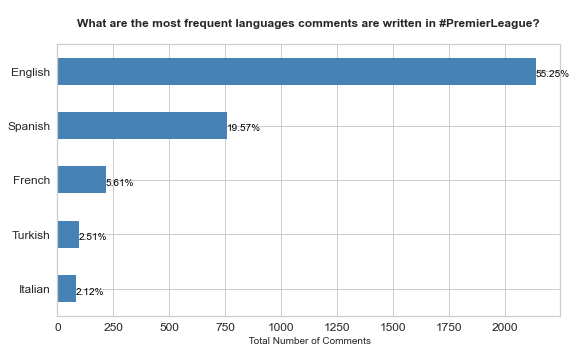

In [37]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(5).plot(kind='barh', figsize=(9,5), color="steelblue", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in #PremierLeague?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'Spanish', 'French', 'Turkish', 'Italian'])

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = df.language.value_counts().sum()

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()
ax.figure.savefig("../Fig/freq-lang_#PremierLeague.png")

In [38]:
df = df.reset_index(drop=True)

In [39]:
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]

## VADER

In [40]:
df_eng.reset_index(drop=True)

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean,language
0,Man Utd Corner,@manutdcorner7,2020-11-25,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner,#MUFC #ManchesterUnited #UCL #PremierLeague #Fred,Manchester United have won 8 out of 10 games w...,en
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen,#COYS #PremierLeague,"Man Sheiky got battered the other day, lets ba...",en
2,Billy Wood,@billywood__,2020-11-25,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood,#PremierLeague #PL,Andy Cole surely has to be the most underrated...,en
3,Inplay Challenges,@bash_the_bookie,2020-11-25,Yet to try out WilliamHill? They will credit ...,NaN,NaN,NaN,Inplay Challenges,#Ad #HorseRacing #Football #PremierLeague,Yet to try out WilliamHill? They will credit ...,en
4,The VAR Show,@thevarshow1,2020-11-25,Amazing talk with : @neiljonesgoal To Watch...,NaN,NaN,NaN,The VAR Show,#Liverpool #LiverpoolAtalanta #Goal #Klopp #Ne...,Amazing talk with : @neiljonesgoal To Watch...,en
...,...,...,...,...,...,...,...,...,...,...,...
2132,Adam Bateman,@boxybate,2020-11-21,Pep still a better manager than Ole yeah??? S...,3,NaN,4,Adam Bateman,#MindTheGap #ManchesterIsRed #PremierLeague,Pep still a better manager than Ole yeah??? S...,en
2133,Ekemini Daniel,@dee_kemus,2020-11-21,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel,#MUNWBA #PremierLeague,"3 points in the bag, but na like this we wan t...",en
2134,Man Utd Corner,@manutdcorner7,2020-11-21,The title charge is on #MUFC #ManUtd #Manches...,NaN,NaN,3,Man Utd Corner,#MUFC #ManUtd #ManchesterUnited #PremierLeague,The title charge is on,en
2135,Mats FC,@matsmufc,2020-11-21,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC,#FlashScore #manutd #mufc #MUNWBA #PremierLeague,No events in the first half? I have never seen...,en


In [41]:
%%time

df_eng['sentiment_neg'] = df_eng['Clean'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['Clean'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['Clean'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['Clean'].apply(compound_score)

Wall time: 1.35 s


In [42]:
df_eng

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,Man Utd Corner,@manutdcorner7,2020-11-25,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner,#MUFC #ManchesterUnited #UCL #PremierLeague #Fred,Manchester United have won 8 out of 10 games w...,en,0.000,0.667,0.333,0.7579
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen,#COYS #PremierLeague,"Man Sheiky got battered the other day, lets ba...",en,0.000,1.000,0.000,0.0000
2,Billy Wood,@billywood__,2020-11-25,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood,#PremierLeague #PL,Andy Cole surely has to be the most underrated...,en,0.000,0.894,0.106,0.6114
5,Inplay Challenges,@bash_the_bookie,2020-11-25,Yet to try out WilliamHill? They will credit ...,NaN,NaN,NaN,Inplay Challenges,#Ad #HorseRacing #Football #PremierLeague,Yet to try out WilliamHill? They will credit ...,en,0.000,0.751,0.249,0.8986
6,The VAR Show,@thevarshow1,2020-11-25,Amazing talk with : @neiljonesgoal To Watch...,NaN,NaN,NaN,The VAR Show,#Liverpool #LiverpoolAtalanta #Goal #Klopp #Ne...,Amazing talk with : @neiljonesgoal To Watch...,en,0.000,0.798,0.202,0.5859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,Adam Bateman,@boxybate,2020-11-21,Pep still a better manager than Ole yeah??? S...,3,NaN,4,Adam Bateman,#MindTheGap #ManchesterIsRed #PremierLeague,Pep still a better manager than Ole yeah??? S...,en,0.046,0.564,0.390,0.8677
3931,Ekemini Daniel,@dee_kemus,2020-11-21,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel,#MUNWBA #PremierLeague,"3 points in the bag, but na like this we wan t...",en,0.000,0.812,0.188,0.5023
3932,Man Utd Corner,@manutdcorner7,2020-11-21,The title charge is on #MUFC #ManUtd #Manches...,NaN,NaN,3,Man Utd Corner,#MUFC #ManUtd #ManchesterUnited #PremierLeague,The title charge is on,en,0.000,1.000,0.000,0.0000
3933,Mats FC,@matsmufc,2020-11-21,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC,#FlashScore #manutd #mufc #MUNWBA #PremierLeague,No events in the first half? I have never seen...,en,0.282,0.718,0.000,-0.5122


In [43]:
df_eng[df_eng.sentiment_neu == 1]

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen,#COYS #PremierLeague,"Man Sheiky got battered the other day, lets ba...",en,0.0,1.0,0.0,0.0
10,Across the Pond Restaurant & Pub,@acrosstheponddc,2020-11-25,"Hear about new specials, upcoming sporting eve...",NaN,NaN,NaN,Across the Pond Restaurant & Pub,#irishpub #rugby #washingtondc #dupontcircle #...,"Hear about new specials, upcoming sporting eve...",en,0.0,1.0,0.0,0.0
13,IMVP,@inmyviewpodcast,2020-11-25,Listen to the most recent episode of my podcas...,NaN,4.0,4,IMVP,#PLfans #ManchesterUnited #PremierLeague #bbcf...,Listen to the most recent episode of my podcas...,en,0.0,1.0,0.0,0.0
21,The North End Pod Cast,@thenorthendpod1,2020-11-25,NEW EPISODE! This week we get cozy with @CPF...,NaN,1.0,1,The North End Pod Cast,#PremierLeague #cpfc,NEW EPISODE! This week we get cozy with @CPF...,en,0.0,1.0,0.0,0.0
28,graham coleman,@grahamcoleman09,2020-11-25,#PremierLeague #PremierLeagueiscorrupt #PL2 #t...,NaN,1.0,5,graham coleman,#PremierLeague #PremierLeagueiscorrupt #PL2 #t...,Bet you they are both saying : Wh...,en,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,Omi Sido,@omisido,2020-11-21,From Mourinho to Ole. This is the biggest down...,2,NaN,1,Omi Sido,#MUFC #PremierLeague #MUNWBA #PL,From Mourinho to Ole. This is the biggest down...,en,0.0,1.0,0.0,0.0
3919,Sanket Uikey,@sanketuikey,2020-11-21,How many times are we gonna use 'Bruno's - Get...,NaN,NaN,NaN,Sanket Uikey,#MUNWBA #PremierLeague,How many times are we gonna use 'Bruno's - Get...,en,0.0,1.0,0.0,0.0
3923,Omi Sido,@omisido,2020-11-21,VAR OVERTURNS: DECISIONS FOR Man Utd 5 Bright...,1,NaN,2,Omi Sido,#MUFC #PremierLeague #MUNWBA #PL,VAR OVERTURNS: DECISIONS FOR Man Utd 5 Bright...,en,0.0,1.0,0.0,0.0
3926,Jamie White,@jswhite12,2020-11-21,David Coote should never ref another premier l...,NaN,NaN,NaN,Jamie White,#PremierLeague #United #ManUvsWestBrom #Refere...,David Coote should never ref another premier l...,en,0.0,1.0,0.0,0.0


In [44]:
a = df_eng[['User','sentiment_compound']].groupby('User').agg(['count','mean'])
a = a.sentiment_compound.reset_index()
a = a.copy()
a.columns = "User" , "Count", "sentiment_compound"

In [45]:
a[a.sentiment_compound == 0].sort_values(by="Count")

,User,Count,sentiment_compound
3,@109oratile,1,0.0
942,@obsessedhashtag,1,0.0
939,@nutmegiwobi,1,0.0
937,@nova88official,1,0.0
926,@nicky_johnny,1,0.0
...,...,...,...
764,@lebensgeister13,4,0.0
138,@ariaristimuno,4,0.0
751,@laguiapambolera,5,0.0
343,@cybermc11,5,0.0


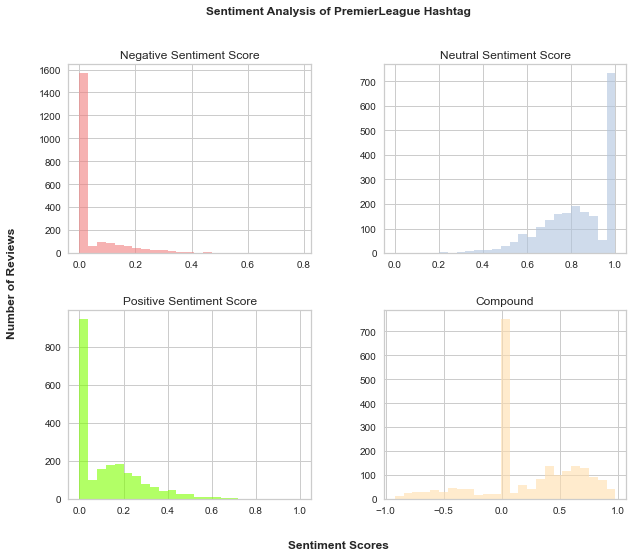

In [46]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

df_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of PremierLeague Hashtag\n\n', fontsize=12, fontweight='bold');

In [47]:
# Categorized the compound
df_eng['comp_cat'] = df_eng['sentiment_compound'].apply(lambda c: 'pos' if c >=0.5 else ('neg' if c <=-0.5  else 'neu'))


In [48]:
df_eng

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,comp_cat
0,Man Utd Corner,@manutdcorner7,2020-11-25,Manchester United have won 8 out of 10 games w...,NaN,NaN,NaN,Man Utd Corner,#MUFC #ManchesterUnited #UCL #PremierLeague #Fred,Manchester United have won 8 out of 10 games w...,en,0.000,0.667,0.333,0.7579,pos
1,Mads WIlliam Pagh Thomasen,@m2masen,2020-11-25,"Man Sheiky got battered the other day, lets ba...",NaN,NaN,NaN,Mads WIlliam Pagh Thomasen,#COYS #PremierLeague,"Man Sheiky got battered the other day, lets ba...",en,0.000,1.000,0.000,0.0000,neu
2,Billy Wood,@billywood__,2020-11-25,Andy Cole surely has to be the most underrated...,2,NaN,5,Billy Wood,#PremierLeague #PL,Andy Cole surely has to be the most underrated...,en,0.000,0.894,0.106,0.6114,pos
5,Inplay Challenges,@bash_the_bookie,2020-11-25,Yet to try out WilliamHill? They will credit ...,NaN,NaN,NaN,Inplay Challenges,#Ad #HorseRacing #Football #PremierLeague,Yet to try out WilliamHill? They will credit ...,en,0.000,0.751,0.249,0.8986,pos
6,The VAR Show,@thevarshow1,2020-11-25,Amazing talk with : @neiljonesgoal To Watch...,NaN,NaN,NaN,The VAR Show,#Liverpool #LiverpoolAtalanta #Goal #Klopp #Ne...,Amazing talk with : @neiljonesgoal To Watch...,en,0.000,0.798,0.202,0.5859,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,Adam Bateman,@boxybate,2020-11-21,Pep still a better manager than Ole yeah??? S...,3,NaN,4,Adam Bateman,#MindTheGap #ManchesterIsRed #PremierLeague,Pep still a better manager than Ole yeah??? S...,en,0.046,0.564,0.390,0.8677,pos
3931,Ekemini Daniel,@dee_kemus,2020-11-21,"3 points in the bag, but na like this we wan t...",1,NaN,2,Ekemini Daniel,#MUNWBA #PremierLeague,"3 points in the bag, but na like this we wan t...",en,0.000,0.812,0.188,0.5023,pos
3932,Man Utd Corner,@manutdcorner7,2020-11-21,The title charge is on #MUFC #ManUtd #Manches...,NaN,NaN,3,Man Utd Corner,#MUFC #ManUtd #ManchesterUnited #PremierLeague,The title charge is on,en,0.000,1.000,0.000,0.0000,neu
3933,Mats FC,@matsmufc,2020-11-21,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC,#FlashScore #manutd #mufc #MUNWBA #PremierLeague,No events in the first half? I have never seen...,en,0.282,0.718,0.000,-0.5122,neg


In [49]:
df_eng['comp_cat'].value_counts(normalize=True)

neu    0.635938
pos    0.295274
neg    0.068788
Name: comp_cat, dtype: float64

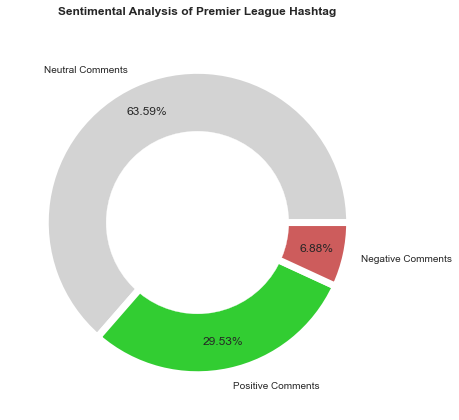

In [50]:
# assign the data
data = df_eng['comp_cat'].value_counts(normalize=True)
names = ['Neutral Comments','Positive Comments', 'Negative Comments']


# call a pie chart
plt.pie(data, labels= names, colors=['lightgray', 'limegreen', 'indianred' ], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
plt.title('Sentimental Analysis of Premier League Hashtag\n', fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()


fig.savefig("../Fig/SA_#PremierLeague.png")

In [51]:
# full dataframe with NEGATIVE comments
df_neg = df_eng.loc[df_eng.sentiment_compound <= -0.50]

# only corpus of NEGATIVE comments
neg_comments = df_neg['Text'].tolist()

In [52]:
df_neg

,Name,User,Date,Text,Comment,Retweet,Likes,Desc,Hashtags,Clean,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,comp_cat
162,Simon Currie,@sicurrie,2020-11-25,Stupid decision by the govt to allow fans back...,NaN,NaN,NaN,Simon Currie,#PremierLeague,Stupid decision by the govt to allow fans back...,en,0.250,0.675,0.075,-0.6597,neg
215,Wee_Rogue (@,@rogue_wee,2020-11-25,#PremierLeague Team Ratings model update follo...,1,5.0,22,Wee_Rogue (@,#PremierLeague,Team Ratings model update following GW9 Som...,en,0.178,0.764,0.057,-0.6906,neg
293,Boot Room Podcast,@bootroompodcast,2020-11-25,Very hard to argue with Lampard on Paul Pogba....,2,4.0,14,Boot Room Podcast,#MUFC #Pogba #PremierLeague,Very hard to argue with Lampard on Paul Pogba....,en,0.326,0.674,0.000,-0.5198,neg
345,Boot Room Podcast,@bootroompodcast,2020-11-25,In last night's podcast @JamieHolme @alanro...,2,1.0,7,Boot Room Podcast,#TOTMCI #MCFC #PremierLeague,In last night's podcast @JamieHolme @alanro...,en,0.214,0.786,0.000,-0.7845,neg
353,Austin The Red,@austin_utd,2020-11-25,Kills the whole aspect of having fans. #Epl #...,NaN,NaN,1,Austin The Red,#Epl #PremierLeague #football #borrisjohnson,Kills the whole aspect of having fans.,en,0.368,0.632,0.000,-0.5423,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,Daniel Kay,@dk4poetry,2020-11-21,"#MUNWBA #wba everyone hates us, and we’re not ...",1,NaN,1,Daniel Kay,#MUNWBA #wba #PremierLeague,"everyone hates us, and we’re not welcome i...",en,0.435,0.565,0.000,-0.6575,neg
3924,Aydn Loffman,@aydn_loffman,2020-11-21,VAR is a f@*k$*g disgrace. 4 officials in the ...,NaN,NaN,3,Aydn Loffman,#wbafc #PremierLeague,VAR is a f@*k$*g disgrace. 4 officials in the ...,en,0.190,0.670,0.140,-0.5707,neg
3928,Babajide Fadoju,@babajidefadoju,2020-11-21,Imagine Goliath telling the referee to tie Dav...,2,4.0,3,Babajide Fadoju,#MUNWBA #PremierLeague,Imagine Goliath telling the referee to tie Dav...,en,0.282,0.718,0.000,-0.9175,neg
3933,Mats FC,@matsmufc,2020-11-21,No events in the first half? I have never seen...,NaN,NaN,NaN,Mats FC,#FlashScore #manutd #mufc #MUNWBA #PremierLeague,No events in the first half? I have never seen...,en,0.282,0.718,0.000,-0.5122,neg


In [53]:
for i in df_neg.Text:
    if len(i) < 120:
        print(i)

Stupid decision by the govt to allow fans back in to stadiums. Boris showing how weak a leader he is. #PremierLeague
Very hard to argue with Lampard on Paul Pogba....   #MUFC | #Pogba | #PremierLeague
Kills the whole aspect of having fans.  #Epl #PremierLeague #football #borrisjohnson
These man tryna take the #PremierLeague for Wimbledon   recipe for disaster!
Andre Marriner is stealing a living! The best league In the   with the worst officials   #WOLSOU #PremierLeague
Tommy Smith on #COVID19 and #PremierLeague openings was th most painfully stupid things I've heard
Really didn’t understand that decision , so poor    #PremierLeague
Leeds fail to score against stubborn 10 man Arsenal #premierleague #SuperSunday #Arsenal #LeedsUnited #Pépé
Crisis? What crisis? Champions in cruise control. #LIVLEI 3-0 #PremierLeague
Who's had the worst performance of the day.....  #lcfc #lfc #LIVLEI #PremierLeague
#PremierLeague I thought Liverpool were supposed to be shit nowadays... #LIVLEI
Leicester h

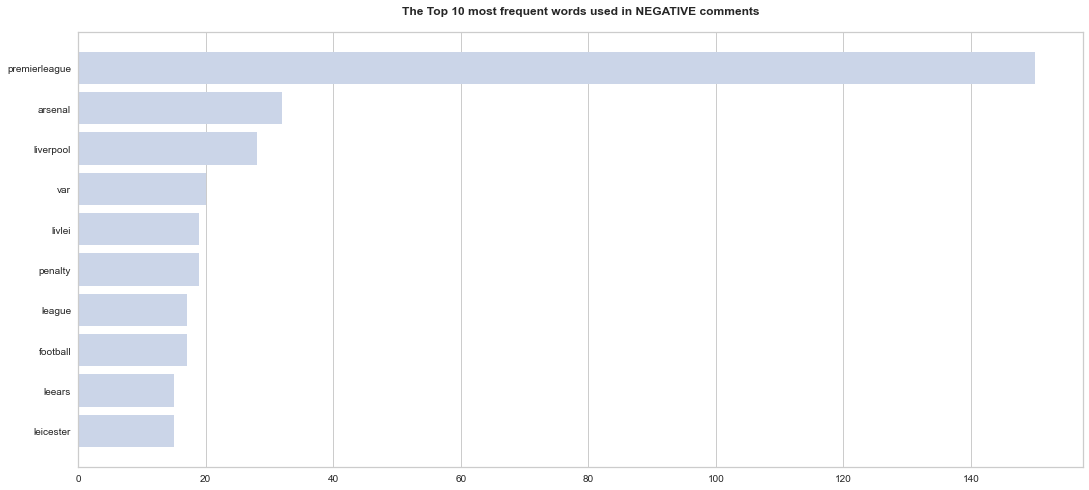

In [54]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 10 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=10)
visualizer.fit(docs)
visualizer.poof;

## Word Cleaning

In [55]:
df_eng["Clean"] = df_eng['Clean'].apply(lambda x: cleaning(x)) 

In [56]:
from collections import Counter

vocab = Counter()
for tweet in df_eng["Clean"]:
    for word in tweet.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('game', 275),
 ('v', 274),
 ('league', 233),
 ('arsenal', 205),
 ('get', 193),
 ('liverpool', 188),
 ('premier', 164),
 ('win', 163),
 ('team', 156),
 ('goal', 152),
 ('united', 140),
 ('season', 140),
 ('leicester', 127),
 ('city', 124),
 ('fan', 123),
 ('leeds', 121),
 ('match', 120),
 ('football', 119),
 ('player', 110),
 ('back', 109)]

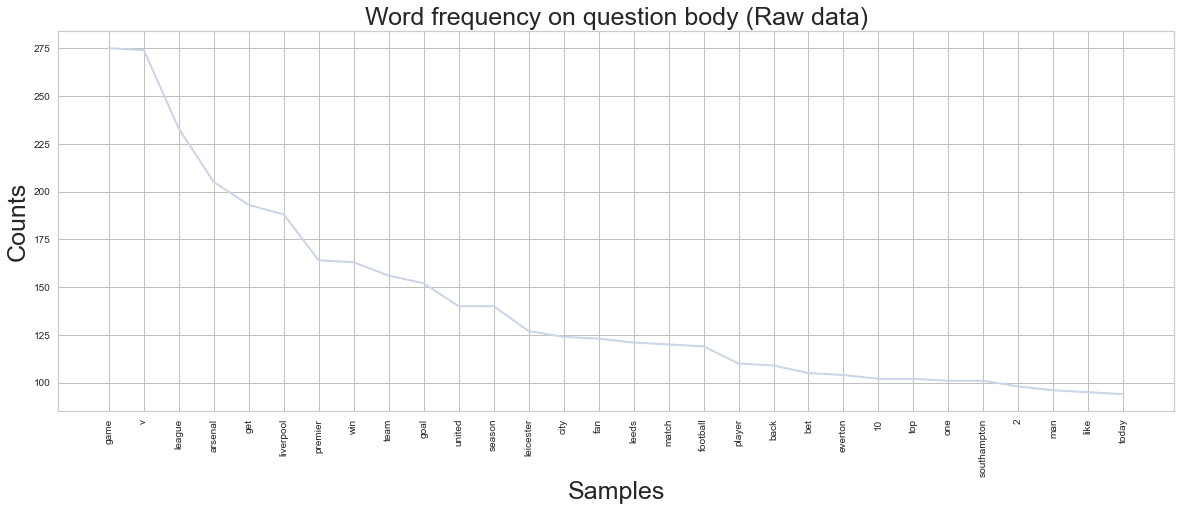

In [57]:
from nltk.probability import FreqDist

freq_dist = FreqDist([word for text in df_eng["Clean"].str.replace('[^a-za-z0-9^,!.\/+-=]',' ') for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question body (Raw data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(30,cumulative=False)
plt.show()

In [58]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 3934
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                2103 non-null   object        
 1   User                2137 non-null   object        
 2   Date                2137 non-null   datetime64[ns]
 3   Text                2137 non-null   object        
 4   Comment             353 non-null    object        
 5   Retweet             421 non-null    float64       
 6   Likes               948 non-null    object        
 7   Desc                2102 non-null   object        
 8   Hashtags            2137 non-null   object        
 9   Clean               2137 non-null   object        
 10  language            2137 non-null   object        
 11  sentiment_neg       2137 non-null   float64       
 12  sentiment_neu       2137 non-null   float64       
 13  sentiment_pos       2137 non-null   float64     

In [59]:
prin = df_eng.Date.value_counts().reset_index()
prin.columns= "Date", "Coun"
prin = prin.sort_values(by="Date")

In [60]:
prin.Coun.mean()

427.4

In [61]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()

#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], mode='lines+markers',
                    name='lines+markers'))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)

fig.update_yaxes(
    title = 'Tweets #PremierLeague'
)

#Show
fig.show()
fig.write_html("../../Fig/Tweets_PremierLeague2.html")

FileNotFoundError: [Errno 2] No such file or directory: '../../Fig/Tweets_PremierLeague2.html'

In [ ]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()
#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], connectgaps=False))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)
fig.update_yaxes(
    title = 'Tweets #PremierLeague'
)
#Show
fig.show()
fig.write_html("../../Fig/Tweets_PremierLeague.html")

In [ ]:
df_eng.User.value_counts()

In [ ]:
# visualizing the comments' languages b) neat and clean

ax = df_eng.User.value_counts().plot(kind='barh', figsize=(10,5), color="steelblue", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent users written in the #PremierLeague?\n", 
             fontsize=14, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=12)
ax.set_yticklabels(df_eng.User.value_counts().index[0:5], fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
fig = ax.invert_yaxis()

ax.figure.savefig("../Fig/freq-user_#PremierLeague.png")

# NFL

## Data Cleaning

In [ ]:
#Import the data
df = pd.read_csv('../datasets/_2-NFL - Búsqueda de Twitter _ Twitter.csv', error_bad_lines=False)
df

In [ ]:
# Change the name of the columns 
df.columns = "Name","User" , "Date", "Text", "Comment", "Retweet", "Likes" 

In [ ]:
# checking shape ...
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.Text.duplicated().sum()))

In [ ]:
df.info()

In [ ]:
# How look like the null-values in the Name, looks 'normal' so move on
df[df.Name.isnull()]

In [ ]:
# How look like the null-values in the User, this are empty in the Text value to
df[df.User.isnull()]

In [ ]:
# Dropped the values duplicates
df.drop(list(df[df.Text.duplicated()].index), axis=0,inplace=True)

In [ ]:
# Reset the index
df.reset_index(drop=True, inplace = True)

In [ ]:
# Checking the values in Date variable, the tweets of the 25/nov are counting by hours
df.Date.unique()

In [ ]:
# Repleced the date, for later trasform to datatime
df.loc[:,"Date"] = "27-11-2020"

In [ ]:
# Filled the null values in Date, using the ffill method 
df.Date.fillna(method='ffill', inplace=True) 

In [ ]:
#Trasformed to Datetime
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [ ]:
df.Date.value_counts()

In [ ]:
df.User.value_counts()

## Data Trasformation

In [ ]:
df.User.value_counts()

In [ ]:
# Trasformed the User names to lower case
df["User"] = df['User'].map(lambda x: x.lower() if isinstance(x,str) else x)

#Genereted a list of user that are magazines, newspaper, and the because these aren't User who express their feeling for the sport, 
#they are working for the sports just informing. Dropped the results

listofno = (list(df[df.User.str.contains("news")].User)+ list(df[df.User.str.contains("times")].User) + 
            list(df[df.User.str.contains("review")].User) + list(df[df.User.str.contains("sport")].User) +
            list(df[df.User.str.contains("nfl")].User)) 

# Dropped the User duplicates in the list
listofno = list(dict.fromkeys(listofno)) 
listofno 

In [ ]:
# Selected the user that aren't in the listofno
df1 = df[~df.User.isin(listofno)]
df1

In [ ]:
# Removed the break lines in the tweets 
df1.Text = df1.Text.apply(lambda x: x.replace("\n", " "))
#Create a new column with all the Hashtags used 
df1["Hashtags"] = df1.Text.apply(lambda x: ' '.join((re.findall(r'\B#\w*[a-zA-Z]+\w*', x))))
#Create a new column without the Hashtags 
df1["Clean"] = df1.Text.apply(lambda x: re.sub(r'\B#\w*[a-zA-Z]+\w*'," ", x, flags=re.MULTILINE))
df = df1.copy()

In [ ]:
df

In [ ]:
#Created a new column with the language
df['language'] = df['Clean'].apply(language_detection)

In [ ]:
# Visualizated types of language
df.language.value_counts(normalize=True).head(10).sort_values(ascending = False)

In [ ]:
df.language.value_counts().sum()

In [ ]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(5).plot(kind='barh', figsize=(9,5), color="darkred", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in #NFL?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English',  'Spanish', 'German',  'Portuguese', 'Catalan',])

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = df.language.value_counts().sum() 

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()
ax.figure.savefig("../Fig/freq-lang_#NFL.png")

In [ ]:
df_eng = df[(df['language']=='en')].reset_index(drop=True)
df_de  = df[(df['language']=='de')].reset_index(drop=True)
df_fr  = df[(df['language']=='fr')].reset_index(drop=True)


## VADER

In [ ]:
df_eng.reset_index(drop=True)

In [ ]:
%%time

df_eng['sentiment_neg'] = df_eng['Clean'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['Clean'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['Clean'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['Clean'].apply(compound_score)

In [ ]:
df_eng

In [ ]:
df_eng[df_eng.sentiment_neu == 1]

In [ ]:
a = df_eng[['User','sentiment_compound']].groupby('User').agg(['count','mean'])
a = a.sentiment_compound.reset_index()
a = a.copy()
a.columns = "User" , "Count", "sentiment_compound"

In [ ]:
a[a.sentiment_compound == 0].sort_values(by="Count")

In [ ]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

df_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of PremierLeague Hashtag\n\n', fontsize=12, fontweight='bold');

In [ ]:
# Categorized the compound
df_eng['comp_cat'] = df_eng['sentiment_compound'].apply(lambda c: 'pos' if c >=0.5 else ('neg' if c <=-0.5  else 'neu'))


In [ ]:
df_eng

In [ ]:
df_eng['comp_cat'].value_counts(normalize=True)

In [ ]:
# assign the data
data = df_eng['comp_cat'].value_counts(normalize=True)
names = ['Neutral Comments','Positive Comments', 'Negative Comments']


# call a pie chart
plt.pie(data, labels= names, colors=['lightgray', 'limegreen', 'indianred' ], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
plt.title('Sentimental Analysis of Premier League Hashtag\n', fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()


fig.savefig("../Fig/SA_#PremierLeague.png")

In [ ]:
# full dataframe with NEGATIVE comments
df_neg = df_eng.loc[df_eng.sentiment_compound <= -0.50]

# only corpus of NEGATIVE comments
neg_comments = df_neg['Text'].tolist()

In [ ]:
df_neg

In [ ]:
for i in df_neg.Text:
    if len(i) < 120:
        print(i)

In [ ]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 10 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=10)
visualizer.fit(docs)
visualizer.poof;

## Word Cleaning

In [ ]:
df_eng["Clean"] = df_eng['Clean'].apply(lambda x: cleaning(x)) 

In [ ]:
from collections import Counter

vocab = Counter()
for tweet in df_eng["Clean"]:
    for word in tweet.split(' '):
        vocab[word] += 1

vocab.most_common(20)

In [ ]:
df_eng.info()

In [ ]:
prin = df_eng.Date.value_counts().reset_index()
prin.columns= "Date", "Coun"


In [ ]:
prin.Coun.mean()

In [ ]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()

#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], mode='lines+markers',
                    name='lines+markers'))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)

fig.update_yaxes(
    title = 'Tweets #NFL'
)

#Show
fig.show()
fig.write_html("../../Fig/Tweets_NFL.html")

In [ ]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()
#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], connectgaps=False))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)
fig.update_yaxes(
    title = 'Tweets #NFL'
)
#Show
fig.show()
fig.write_html("../../Fig/Tweets_NFL2.html")

In [ ]:
# visualizing the comments' languages b) neat and clean
ax = df_eng.User.value_counts().head(5).plot(kind='barh', figsize=(10,5), color="darkred", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent users written in the #NFL?\n", 
             fontsize=14, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=12)
ax.set_yticklabels(df_eng.User.value_counts().index[0:5], fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
fig = ax.invert_yaxis()

ax.figure.savefig("../../Fig/freq-user_#Tweets_NFL.png")

# NBA

## Data Cleaning

In [ ]:
#Import the data
df = pd.read_csv('../datasets/_3-NBAPlayoffs- Búsqueda de Twitter _ Twitter.csv', error_bad_lines=False)
df

In [ ]:
# Change the name of the columns 
df.columns = "Name","User" , "Date", "Text", "Comment", "Retweet", "Likes", "Desc"

In [ ]:
# Checking shape ...
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.Text.duplicated().sum()))

In [ ]:
df.info()

In [ ]:
# How look like the null-values in the Name, looks 'normal' so move on
df[df.Name.isnull()]

In [ ]:
# How look like the null-values in the User, this are empty in the Text value to
df[df.User.isnull()]

In [ ]:
# Selected all the rows that have not null values in User
df = df[~df.User.isnull()]

In [ ]:
# Dropped the values duplicates
df.drop(list(df[df.Text.duplicated()].index), axis=0,inplace=True)

In [ ]:
# Reset the index
df.reset_index(drop=True, inplace = True)

In [ ]:
# Checking the values in Date variable, the tweets of the 25/nov are counting by hours
df.Date.unique()

In [ ]:
df#.loc[df.Date == "20h"]

In [ ]:
# Standarized the Date
df.loc[0:3 ,"Date"] = "23 nov."

In [ ]:
# Added the 2020 in the Date
df.loc[:,"Date"] += " 2020"

In [ ]:
# Repleced the Nov, for later trasform to datatime
df["Date" ]= df.Date.str.replace(" oct. ", "-10-")
df["Date" ]= df.Date.str.replace(" nov. ", "-11-")

In [ ]:
# Filled the null values in Date, using the ffill method 
df.Date.fillna(method='ffill', inplace=True) 

In [ ]:
#Trasformed to Datetime
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [ ]:
df.Date.value_counts()

In [ ]:
df.User.value_counts()

In [ ]:
df.Name.value_counts()

## Data Trasformation

In [ ]:
# Trasformed the User names to lower case
df["User"] = df['User'].map(lambda x: x.lower() if isinstance(x,str) else x)

#Genereted a list of user that are magazines, newspaper, and the because these aren't User who express their feeling for the sport, 
#they are working for the sports just informing. Dropped the results

listofno = (list(df[df.User.str.contains("news")].User)+ list(df[df.User.str.contains("times")].User) + 
            list(df[df.User.str.contains("review")].User) + list(df[df.User.str.contains("sport")].User) 
            + list(df[df.User.str.contains("nba")].User + list(df[df.User.str.contains("radio")].User)) 
listofno = listofno + ["@nba_alinstante"]


# Dropped the User duplicates in the list
listofno = list(dict.fromkeys(listofno)) 
listofno 

In [ ]:
# Selected the user that aren't in the listofno
df1 = df[~df.User.isin(listofno)]
df1= df1[~df.Text.isnull()]

In [ ]:
# Removed the break lines in the tweets 
df1.Text = df1.Text.apply(lambda x: x.replace("\n", " "))
#Create a new column with all the Hashtags used 
df1["Hashtags"] = df1.Text.apply(lambda x: ' '.join((re.findall(r'\B#\w*[a-zA-Z]+\w*', x))))
#Create a new column without the Hashtags 
df1["Clean"] = df1.Text.apply(lambda x: re.sub(r'\B#\w*[a-zA-Z]+\w*'," ", x, flags=re.MULTILINE))
df = df1.copy()

In [ ]:
df

In [ ]:
#Created a new column with the language
df['language'] = df['Clean'].apply(language_detection)


In [ ]:
# Visualizated types of language
df.language.value_counts(normalize=True).head(10).sort_values(ascending = False)

In [ ]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(5).plot(kind='barh', figsize=(9,5), color="grey", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in #NBA?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'Spanish', 'French', 'Portuguese', 'Italian' ])

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = df.language.value_counts().sum()

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()
ax.figure.savefig("../Fig/freq-lang_#NBA.png")

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]


## VADER

In [ ]:
df_eng.reset_index(drop=True)

In [ ]:
%%time

df_eng['sentiment_neg'] = df_eng['Clean'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['Clean'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['Clean'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['Clean'].apply(compound_score)

In [ ]:
df_eng

In [ ]:
df_eng[df_eng.sentiment_neu == 1]

In [ ]:
a = df_eng[['User','sentiment_compound']].groupby('User').agg(['count','mean'])
a = a.sentiment_compound.reset_index()
a = a.copy()
a.columns = "User" , "Count", "sentiment_compound"

In [ ]:
a[a.sentiment_compound == 0].sort_values(by="Count")

In [ ]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df_eng.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

df_eng.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df_eng.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df_eng.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of PremierLeague Hashtag\n\n', fontsize=12, fontweight='bold');

In [ ]:
# Categorized the compound
df_eng['comp_cat'] = df_eng['sentiment_compound'].apply(lambda c: 'pos' if c >=0.5 else ('neg' if c <=-0.5  else 'neu'))


In [ ]:
df_eng

In [ ]:
df_eng['comp_cat'].value_counts(normalize=True)

In [ ]:
# assign the data
data = df_eng['comp_cat'].value_counts(normalize=True)
names = ['Neutral Comments','Positive Comments', 'Negative Comments']


# call a pie chart
plt.pie(data, labels= names, colors=['lightgray', 'limegreen', 'indianred' ], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
plt.title('Sentimental Analysis of Premier League Hashtag\n', fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()


fig.savefig("../Fig/SA_#NBA.png")

In [ ]:
# full dataframe with NEGATIVE comments
df_neg = df_eng.loc[df_eng.sentiment_compound <= -0.50]

# only corpus of NEGATIVE comments
neg_comments = df_neg['Text'].tolist()

In [ ]:
df_neg

In [ ]:
for i in df_neg.Text:
    if len(i) < 120:
        print(i)

In [ ]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 10 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=10)
visualizer.fit(docs)
visualizer.poof;

## Word Cleaning

In [ ]:
df_eng["Clean"] = df_eng['Clean'].apply(lambda x: cleaning(x)) 

In [ ]:
from collections import Counter

vocab = Counter()
for tweet in df_eng["Clean"]:
    for word in tweet.split(' '):
        vocab[word] += 1

vocab.most_common(20)

In [ ]:
from nltk.probability import FreqDist

freq_dist = FreqDist([word for text in df_eng["Clean"].str.replace('[^a-za-z0-9^,!.\/+-=]',' ') for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question body (Raw data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(30,cumulative=False)
plt.show()

In [ ]:
df_eng.info()

In [ ]:
prin = df_eng.Date.value_counts().reset_index()
prin.columns= "Date", "Coun"
prin = prin.sort_values(by="Date")

In [ ]:
prin.Coun.mean()

In [ ]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()

#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], mode='lines+markers',
                    name='lines+markers'))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)

fig.update_yaxes(
    title = 'Tweets #PremierLeague'
)

#Show
fig.show()
fig.write_html("../Fig/Tweets_NBA.html")

In [ ]:
import plotly.graph_objs as go
#Declare figure
fig = go.Figure()
#add a trace
fig.add_trace(go.Scatter(x=prin.Date, y=prin['Coun'], connectgaps=False))
#Update X and Y axis with title
fig.update_xaxes(
    title = 'Date',rangeslider_visible=True
)
fig.update_yaxes(
    title = 'Tweets #PremierLeague'
)
#Show
fig.show()
fig.write_html("../../Fig/Tweets_PremierLeague.html")

In [ ]:
df_eng.User.value_counts()

In [ ]:
# visualizing the comments' languages b) neat and clean

ax = df_eng.User.value_counts().plot(kind='barh', figsize=(10,5), color="grey", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent users written in the #PremierLeague?\n", 
             fontsize=14, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=12)
ax.set_yticklabels(df_eng.User.value_counts().index[0:5], fontsize=10)

# create a list to collect the plt.patches data
totals = []

# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
fig = ax.invert_yaxis()

ax.figure.savefig("../Fig/freq-user_#nba.png")